# Tracking of An Autonomous Robot

## Part I : Sensor Modeling

### Task 1. Static IMU Experiment

We can measure the IMU reading of a static robot using the python script provided in Appendix 5.3.1. We can obtain the bias of the gyroscope by placing the robot in a static position for a period of time. Then, we average the gyroscope readings to obtain the bias.


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics

In [146]:
csv_path = 'imu_reading_task1.csv'

# Load CSV file of the first task
df = pd.read_csv(csv_path)
# Adding columns to the csv file
df.columns = ["time", "accX", "accY", "accZ", "rollAngle", "pitchAngle", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ"]

df

,time,accX,accY,accZ,rollAngle,pitchAngle,gyroX,gyroY,gyroZ,magnX,magnY,magnZ
0,1.603799e+09,0.003172,-0.011712,1.033950,0.058573,-0.040833,0.161018,0.090353,0.141925,0.746419,-0.160626,0.390968
1,1.603799e+09,0.001098,-0.009760,1.036024,-0.002989,0.034359,0.091018,0.160353,0.211925,0.739842,-0.169395,0.386144
2,1.603799e+09,0.003904,-0.009272,1.032852,0.072920,-0.074463,0.126018,0.335352,0.211925,0.739404,-0.161941,0.384537
3,1.603799e+09,0.002806,-0.011590,1.033950,-0.162152,-0.033549,0.196018,0.230352,0.246925,0.739404,-0.161941,0.384537
4,1.603799e+09,0.001464,-0.011712,1.034682,-0.066049,0.013063,-0.013983,0.440352,0.246925,0.747735,-0.159456,0.392721
...,...,...,...,...,...,...,...,...,...,...,...,...
627,1.603800e+09,0.001342,-0.009760,1.032730,0.045786,-0.013568,-0.048982,0.860352,0.421925,0.743788,-0.170564,0.397837
628,1.603800e+09,0.003050,-0.011346,1.033462,-0.041750,-0.013490,0.126018,0.265352,0.071925,0.739550,-0.171003,0.398422
629,1.603800e+09,0.003782,-0.010980,1.026142,0.130873,-0.368468,0.056017,-0.049647,-0.103075,0.739550,-0.168956,0.394183
630,1.603800e+09,0.001342,-0.009760,1.046638,-0.294252,0.201569,0.126018,0.545353,0.246925,0.739550,-0.168956,0.394183


In [147]:
# Extract each of the column value
accX = df['accX']
accY = df['accY']
accZ = df['accZ']
rollAngle = df['rollAngle']
pitchAngle = df['pitchAngle']
gyroX = df['gyroX']
gyroY = df['gyroY']
gyroZ = df['gyroZ']
magnX = df['magnX']
magnY = df['magnY']
magnZ = df['magnZ']

#### Task 1. A
From the measurement record log file visualize the data. What do you observe?
Summarize what you have understood and write it down in your report.

#### Answer
The initial data from our measurements are visualized as figures below. As can be easily noticed from the plots, the measurements are affected with a lot of noises from all the given sensors. We can also notice that there are several outliners in some data points.Those outliners might need to be cleaned up.

In order to deal with those white noises, we should calculate the bias and variance of IMU Sensors.

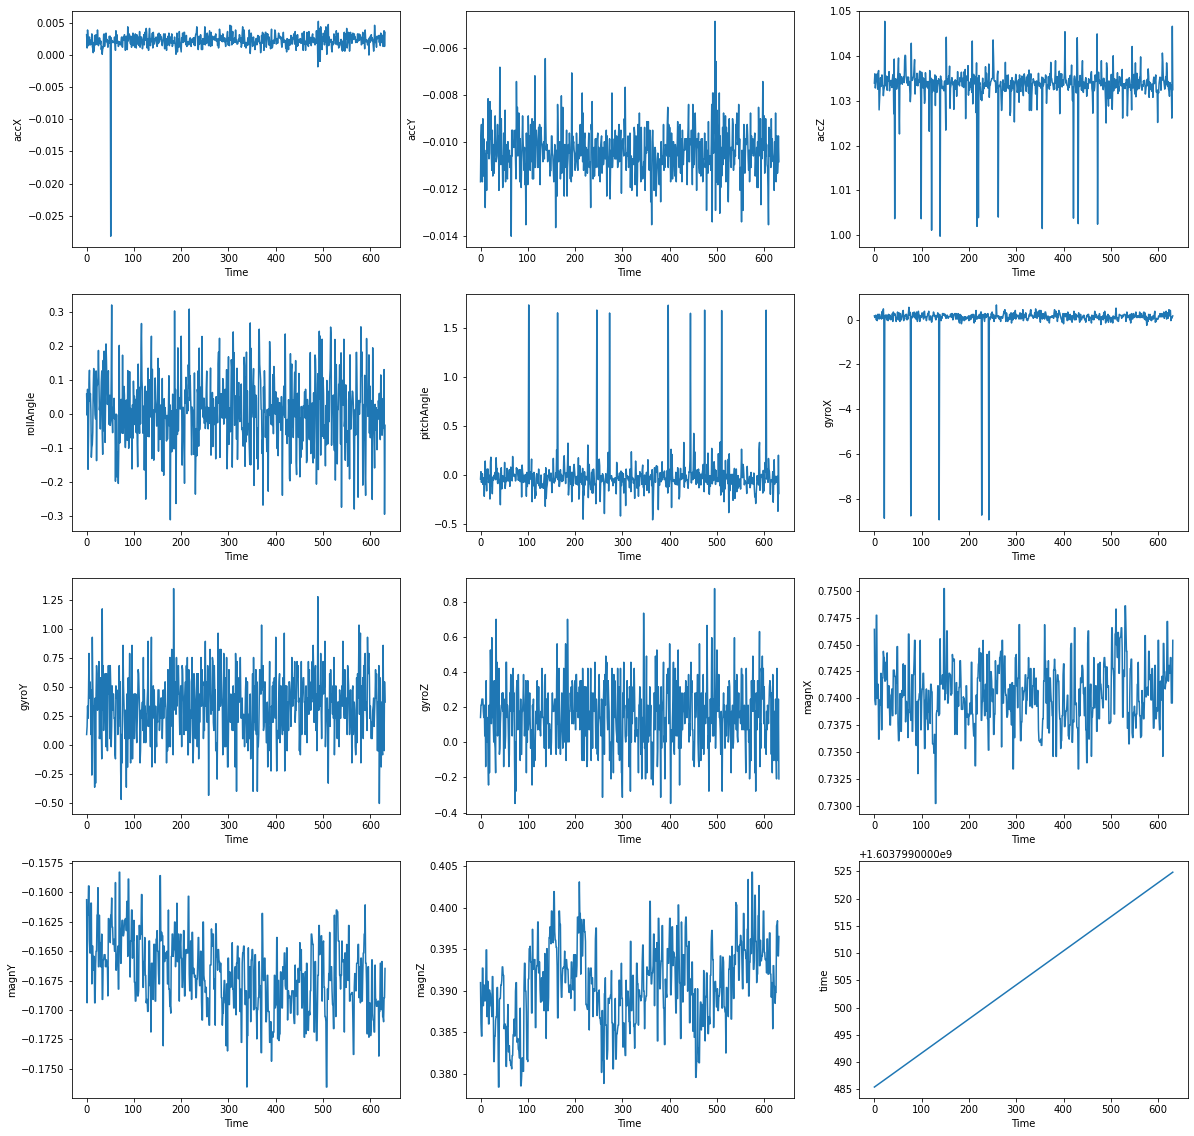

In [148]:
axs_count = 0
fig, axs = plt.subplots(nrows = 4, ncols = 3, figsize=(20,20))
columns = ["accX", "accY", "accZ", "rollAngle", "pitchAngle", "gyroX", "gyroY", "gyroZ", "magnX", "magnY", "magnZ", "time"]
df1 = pd.DataFrame()   
values = [df["accX"], df["accY"], df["accZ"], df["rollAngle"], df["pitchAngle"], df["gyroX"], df["gyroY"], df["gyroZ"], df["magnX"], df["magnY"], df["magnZ"], df["time"]]

# Plot each values corresponding to time
i = 0
for row in axs:
    for col in row:
        col.plot(values[i])
        i += 1

# Assign x and y labels for each plot
j = 0
for row in range(4):
    for col in range(3):
        axs[row][col].set(xlabel="Time", ylabel=columns[j])
        j += 1

plt.show()

#### Task 1b.
Determine the bias and variance of the IMU sensors and write down the result in your report.

There are total three inertial measurement units we should aware of: accelerometer, gyroscope and magnetometer

In [166]:
# Determine the bias of IMU Sensors

IMU_Sensors = [[accX, accY, accZ], [gyroX, gyroY, gyroZ], [magnX, magnY, magnZ]]
sensor_name = ["accelerometer", "gyroscope", "magnetometer"]

# The value of each sensor at static mode is 0
static_value = 0
# Interate through the sensor name list
i = 0

for sensor in IMU_Sensors:
    biasX = statistics.mean(sensor[0]) - static_value
    biasY = statistics.mean(sensor[1]) - static_value
    biasZ = statistics.mean(sensor[2]) - static_value
    
    print("The biases of the ", sensor_name[i],"corresponding to three given axes are", biasX, biasY, biasZ)
    i += 1


The biases of the  accelerometer corresponding to three given axes are 0.0022351867088607597 -0.010438721518987342 1.0333872943037974
The biases of the  gyroscope corresponding to three given axes are 0.06194313291139241 0.33529712025316455 0.15189335443037974
The biases of the  magnetometer corresponding to three given axes are 0.7403888493512658 -0.16686886476265822 0.39072658079113926


In [171]:
# Determine the variance of the IMU Sensors
# Interate through the sensor name list
i = 0

for sensor in IMU_Sensors:
    biasX = statistics.variance(sensor[0])
    biasY = statistics.variance(sensor[1])
    biasZ = statistics.variance(sensor[2])
    
    print("The variances of the ", sensor_name[i],"corresponding to three given axes are", biasX, biasY, biasZ)
    i += 1

The variances of the  accelerometer corresponding to three given axes are 2.2734495245140323e-06 1.126595396176453e-06 2.3923707146211536e-05
The variances of the  gyroscope corresponding to three given axes are 0.6509717646667935 0.07832428377449899 0.034410141627715704
The variances of the  magnetometer corresponding to three given axes are 9.234016909959481e-06 9.762703438919753e-06 2.4536187134215533e-05


### Task 2: IMU Calibration

Plot the data from the measurement record log file. What did you observe?
Determine the gain ki and bias bi for each body axis $$ i = {x, y, z} $$ Write down the results in your report.